In [13]:
import sys
sys.path.append('../..')

In [14]:
import numpy as np
import matplotlib.pyplot as plt


from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import EfficientSU2


from qubap.qiskit.luciano.variational_algorithms import VQE
from qubap.qiskit.luciano.costfunc_barren_plateaus import test_hamiltonian
from qubap.qiskit.felipe.state_efficient_ansatz import ansatz_constructor #SAE

In [15]:
num_qubits = 8

In [16]:
# Exact
simulator_exact = AerSimulator(shots=2**4)

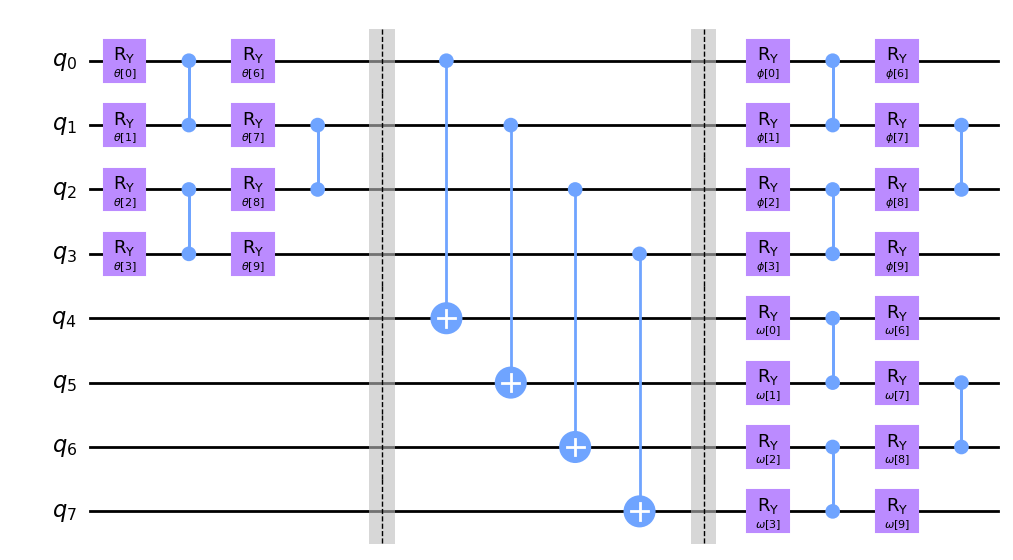

In [17]:
ansatz   = ansatz_constructor( num_qubits )
t_ansatz = transpile(ansatz)

params   = np.random.rand(t_ansatz.num_parameters) * np.pi
ansatz.decompose().draw( 'mpl' )

In [18]:
hamiltoniano = test_hamiltonian( num_qubits, [0,0,1] )

In [19]:
num_iters = 200
results   = VQE( hamiltoniano, t_ansatz, params, num_iters, simulator_exact, returns='fx' )

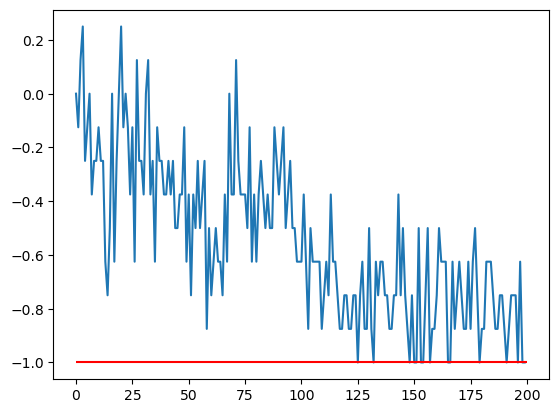

In [20]:
plt.plot(results)
plt.hlines(-1, 0,200, 'r')

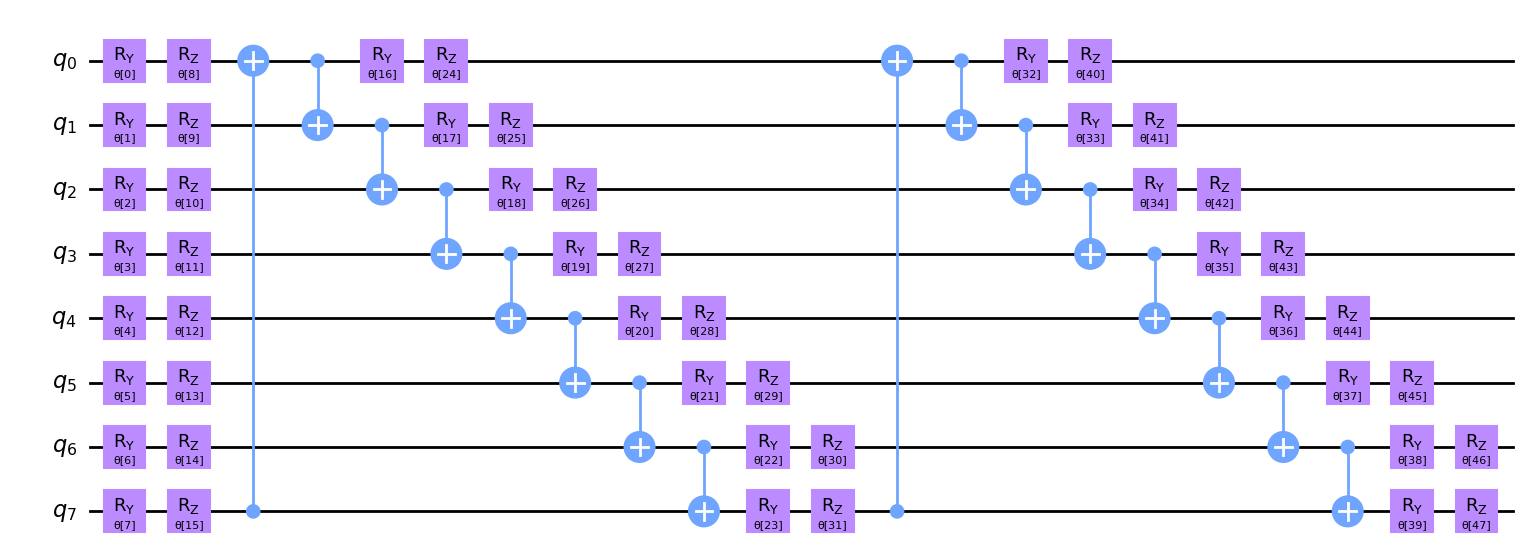

In [21]:
rep       = 2
ansatz_SU = EfficientSU2( num_qubits, ['ry','rz'], 'circular', rep ).decompose()
ansatz_SU.draw('mpl') 

In [22]:
params_SU  = np.random.rand(ansatz_SU.num_parameters) * np.pi

results_SU = VQE( hamiltoniano, ansatz_SU, params_SU, num_iters, simulator_exact, returns='fx' )

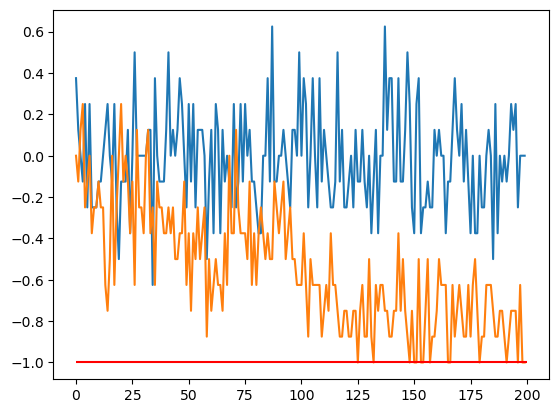

In [23]:
plt.plot(results_SU)
plt.plot(results)
plt.hlines(-1, 0,200, 'r')